In [76]:
%matplotlib notebook

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [79]:
iris = sns.load_dataset("iris")

In [80]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)

In [81]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

<IPython.core.display.Javascript object>


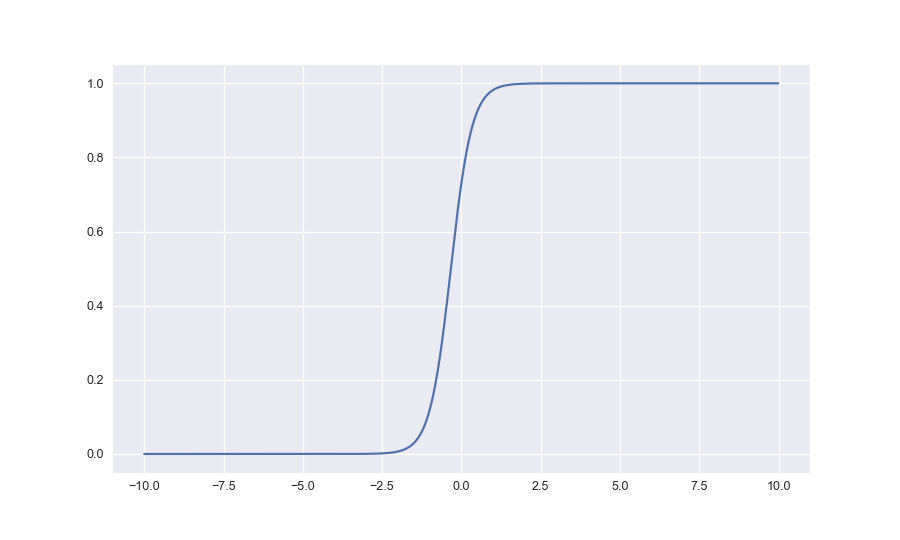

In [82]:
plt.figure(figsize=(10, 6))
x = np.arange(-10, 10, .01)
# modify live the values of w and b
w, b = 3, 1
plt.plot(x, sigmoid(w*x+b));

In [83]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
np.set_printoptions(suppress=True, precision=2)

In [84]:
model.fit(iris[['petal_width']], iris['isVirginica'])
model.coef_ , model.intercept_

(array([[ 2.62]]), array([-4.22]))

<IPython.core.display.Javascript object>


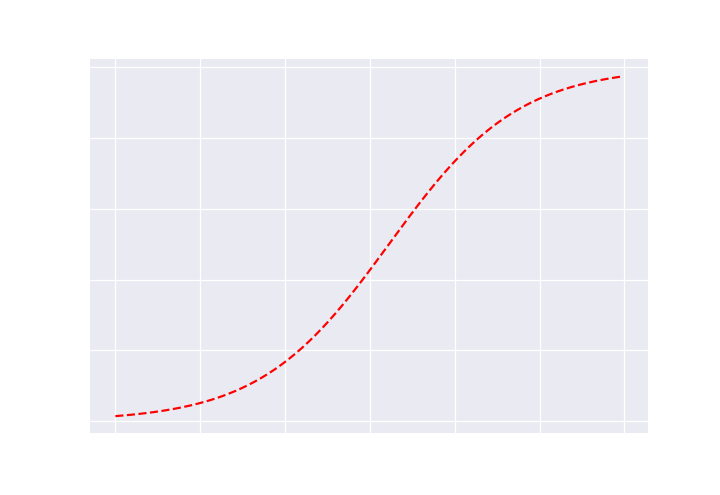

In [87]:
fig, ax = plt.subplots()
sns.set_style("darkgrid")
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('../reports/figures/graph_logistic')

In [88]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)

In [89]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

In [90]:
model = Sequential()
model.add(Dense(3, input_dim=1 ))
model.add(Activation('sigmoid'))
model.add(Dense(1, input_dim=1 ) )
model.add(Activation('sigmoid'))
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

<IPython.core.display.Javascript object>


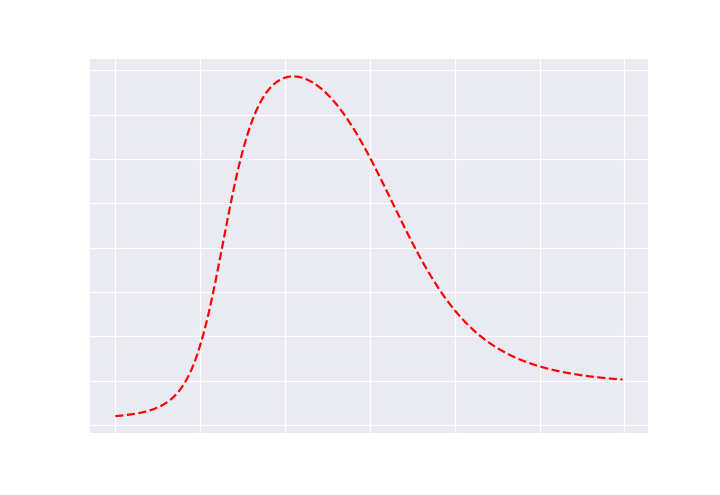

In [91]:
model.fit(iris[['petal_width']], iris[['isVersicolor']],epochs=1000,verbose=0)
probas = model.predict(petal_widths.reshape(-1,1))[:,0]
fig,ax = plt.subplots()
plt.plot(petal_widths,probas,'r--')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.savefig('../reports/figures/graph_nn')